In [10]:
import sys
from pathlib import Path
src_utils_path = Path("../src/utils")
sys.path.append(str(src_utils_path))
import metrics as mjo
import optuna 

import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

import numpy as np
import xarray as xr 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
bccs_raw = np.load('./plot_data/bccs_raw_lat10_lead35_mem95.npy')
bccs_raw30d = np.load('./plot_data/bccs_raw_lat10_lead35_mem29.npy')
bccs_mjo = np.load('./plot_data/bccs_mjo_lat10_lead35_mem95.npy')
bccs_rossby = np.load('./plot_data/bccs_rossby_lat10_lead35_mem95.npy')
bccs_kelvin = np.load('./plot_data/bccs_kelvin_lat10_lead35_mem95.npy')
bccs_gravity = np.load('./plot_data/bccs_gravity_lat10_lead35_mem95.npy')

In [9]:
xr.open_dataset(fn_list[0])

<xarray.Dataset>
Dimensions:      (time: 4618, variable: 72)
Coordinates:
  * time         (time) datetime64[ns] 2010-04-06 2010-04-07 ... 2022-11-26
Dimensions without coordinates: variable
Data variables:
    predictions  (time, variable) float32 ...
    targets      (time, variable) float32 ...

In [19]:
lat_range = 10
lead = 35
memory_last = 29
dataflg = 'raw'
fn_list = []
for exp_num in range(1, 17):
    study_name = f"UNet_A_lat10_lead35_in_olr_tar_ROMI_mem{memory_last}_{dataflg}"
    db_path = f"sqlite:////pscratch/sd/l/linyaoly/MJO_ML_2025/script/model/optuna/{study_name}.db"
    
    # Load the Optuna study
    study = optuna.load_study(study_name=study_name, storage=db_path)
    
    # Get best trial (this could be filtered or just the best overall)
    best_trial = study.best_trial
    params = best_trial.params

    # Extract needed params
    ch = params["num_filters_enc"]
    hidden1 = int(params["hidden_layer_first"])
    hidden2 = int(params["hidden_layer_second"])
    dropout = params["fc_dropout"]
    lr = params["learning_rate"]
    batch = params["batch_size"]
    opt = params["optimizer"]
    wd = params["weight_decay"]
    mom = params.get("momentum", 0.9)  # use 0.9 as default if not in trial
    ksize_h = params["kernel_size_h"]
    ksize_w = params["kernel_size_w"]

    # Construct file path
    filename = f"OLR_{lat_range}deg_lead{lead}_lr{lr}_batch{batch}_dropout{dropout}_ch_{ch}_ksize_{ksize_h}_{ksize_w}_hidden_{hidden1}_{hidden2}_opt_{opt}_mom{mom}_wd{wd}_mem{memory_last}.nc"
    fn = f"/pscratch/sd/l/linyaoly/MJO_ML_2025/script/model/predictions/hov_allleads/UNet_A/exp{exp_num}/{filename}"

    fn_list.append(fn)

bcc_raw30d, _ = mjo.skill_hovallleads_ensemble_mean(fn_list, exp_num_list=np.arange(1,17))


In [13]:
lat_range = 10
lead = 35
memory_last = 95
dataflg = 'raw'
fn_list = []
for exp_num in range(1, 17):
    study_name = f"UNet_A_lat10_lead35_in_olr_tar_ROMI_mem95_{dataflg}"
    db_path = f"sqlite:////pscratch/sd/l/linyaoly/MJO_ML_2025/script/model/optuna/{study_name}.db"
    
    # Load the Optuna study
    study = optuna.load_study(study_name=study_name, storage=db_path)
    
    # Get best trial (this could be filtered or just the best overall)
    best_trial = study.best_trial
    params = best_trial.params

    # Extract needed params
    ch = params["num_filters_enc"]
    hidden1 = int(params["hidden_layer_first"])
    hidden2 = int(params["hidden_layer_second"])
    dropout = params["fc_dropout"]
    lr = params["learning_rate"]
    batch = params["batch_size"]
    opt = params["optimizer"]
    wd = params["weight_decay"]
    mom = params.get("momentum", 0.9)  # use 0.9 as default if not in trial
    ksize_h = params["kernel_size_h"]
    ksize_w = params["kernel_size_w"]

    # Construct file path
    filename = f"OLR_{lat_range}deg_lead{lead}_lr{lr}_batch{batch}_dropout{dropout}_ch_{ch}_ksize_{ksize_h}_{ksize_w}_hidden_{hidden1}_{hidden2}_opt_{opt}_mom{mom}_wd{wd}_mem{memory_last}.nc"
    fn = f"/pscratch/sd/l/linyaoly/MJO_ML_2025/script/model/predictions/hov_allleads/UNet_A/exp{exp_num}/{filename}"

    fn_list.append(fn)

bcc_raw, _ = mjo.skill_hovallleads_ensemble_mean(fn_list, exp_num_list=np.arange(1,17))

dataflg = 'mjo'
fn_list = []
for exp_num in range(1, 17):
    study_name = f"UNet_A_lat10_lead35_in_olr_tar_ROMI_mem95_{dataflg}"
    db_path = f"sqlite:////pscratch/sd/l/linyaoly/MJO_ML_2025/script/model/optuna/{study_name}.db"
    
    # Load the Optuna study
    study = optuna.load_study(study_name=study_name, storage=db_path)
    
    # Get best trial (this could be filtered or just the best overall)
    best_trial = study.best_trial
    params = best_trial.params

    # Extract needed params
    ch = params["num_filters_enc"]
    hidden1 = int(params["hidden_layer_first"])
    hidden2 = int(params["hidden_layer_second"])
    dropout = params["fc_dropout"]
    lr = params["learning_rate"]
    batch = params["batch_size"]
    opt = params["optimizer"]
    wd = params["weight_decay"]
    mom = params.get("momentum", 0.9)  # use 0.9 as default if not in trial
    ksize_h = params["kernel_size_h"]
    ksize_w = params["kernel_size_w"]

    # Construct file path
    filename = f"OLR_{lat_range}deg_lead{lead}_lr{lr}_batch{batch}_dropout{dropout}_ch_{ch}_ksize_{ksize_h}_{ksize_w}_hidden_{hidden1}_{hidden2}_opt_{opt}_mom{mom}_wd{wd}_mem{memory_last}.nc"
    fn = f"/pscratch/sd/l/linyaoly/MJO_ML_2025/script/model/predictions/hov_allleads/UNet_A/exp{exp_num}/{filename}"

    fn_list.append(fn)

bcc_mjo, _ = mjo.skill_hovallleads_ensemble_mean(fn_list, exp_num_list=np.arange(1,17))

dataflg = 'rossby'
fn_list = []
for exp_num in range(1, 17):
    study_name = f"UNet_A_lat10_lead35_in_olr_tar_ROMI_mem95_{dataflg}"
    db_path = f"sqlite:////pscratch/sd/l/linyaoly/MJO_ML_2025/script/model/optuna/{study_name}.db"
    
    # Load the Optuna study
    study = optuna.load_study(study_name=study_name, storage=db_path)
    
    # Get best trial (this could be filtered or just the best overall)
    best_trial = study.best_trial
    params = best_trial.params

    # Extract needed params
    ch = params["num_filters_enc"]
    hidden1 = int(params["hidden_layer_first"])
    hidden2 = int(params["hidden_layer_second"])
    dropout = params["fc_dropout"]
    lr = params["learning_rate"]
    batch = params["batch_size"]
    opt = params["optimizer"]
    wd = params["weight_decay"]
    mom = params.get("momentum", 0.9)  # use 0.9 as default if not in trial
    ksize_h = params["kernel_size_h"]
    ksize_w = params["kernel_size_w"]

    # Construct file path
    filename = f"OLR_{lat_range}deg_lead{lead}_lr{lr}_batch{batch}_dropout{dropout}_ch_{ch}_ksize_{ksize_h}_{ksize_w}_hidden_{hidden1}_{hidden2}_opt_{opt}_mom{mom}_wd{wd}_mem{memory_last}.nc"
    fn = f"/pscratch/sd/l/linyaoly/MJO_ML_2025/script/model/predictions/hov_allleads/UNet_A/exp{exp_num}/{filename}"

    fn_list.append(fn)

bcc_rossby, _ = mjo.skill_hovallleads_ensemble_mean(fn_list, exp_num_list=np.arange(1,17))


dataflg = 'kelvin'
fn_list = []
for exp_num in range(1, 17):
    study_name = f"UNet_A_lat10_lead35_in_olr_tar_ROMI_mem95_{dataflg}"
    db_path = f"sqlite:////pscratch/sd/l/linyaoly/MJO_ML_2025/script/model/optuna/{study_name}.db"
    
    # Load the Optuna study
    study = optuna.load_study(study_name=study_name, storage=db_path)
    
    # Get best trial (this could be filtered or just the best overall)
    best_trial = study.best_trial
    params = best_trial.params

    # Extract needed params
    ch = params["num_filters_enc"]
    hidden1 = int(params["hidden_layer_first"])
    hidden2 = int(params["hidden_layer_second"])
    dropout = params["fc_dropout"]
    lr = params["learning_rate"]
    batch = params["batch_size"]
    opt = params["optimizer"]
    wd = params["weight_decay"]
    mom = params.get("momentum", 0.9)  # use 0.9 as default if not in trial
    ksize_h = params["kernel_size_h"]
    ksize_w = params["kernel_size_w"]

    # Construct file path
    filename = f"OLR_{lat_range}deg_lead{lead}_lr{lr}_batch{batch}_dropout{dropout}_ch_{ch}_ksize_{ksize_h}_{ksize_w}_hidden_{hidden1}_{hidden2}_opt_{opt}_mom{mom}_wd{wd}_mem{memory_last}.nc"
    fn = f"/pscratch/sd/l/linyaoly/MJO_ML_2025/script/model/predictions/hov_allleads/UNet_A/exp{exp_num}/{filename}"

    fn_list.append(fn)

bcc_kelvin, _ = mjo.skill_hovallleads_ensemble_mean(fn_list, exp_num_list=np.arange(1,17))


dataflg = 'gravity'
fn_list = []
for exp_num in range(1, 17):
    study_name = f"UNet_A_lat10_lead35_in_olr_tar_ROMI_mem95_{dataflg}"
    db_path = f"sqlite:////pscratch/sd/l/linyaoly/MJO_ML_2025/script/model/optuna/{study_name}.db"
    
    # Load the Optuna study
    study = optuna.load_study(study_name=study_name, storage=db_path)
    
    # Get best trial (this could be filtered or just the best overall)
    best_trial = study.best_trial
    params = best_trial.params

    # Extract needed params
    ch = params["num_filters_enc"]
    hidden1 = int(params["hidden_layer_first"])
    hidden2 = int(params["hidden_layer_second"])
    dropout = params["fc_dropout"]
    lr = params["learning_rate"]
    batch = params["batch_size"]
    opt = params["optimizer"]
    wd = params["weight_decay"]
    mom = params.get("momentum", 0.9)  # use 0.9 as default if not in trial
    ksize_h = params["kernel_size_h"]
    ksize_w = params["kernel_size_w"]

    # Construct file path
    filename = f"OLR_{lat_range}deg_lead{lead}_lr{lr}_batch{batch}_dropout{dropout}_ch_{ch}_ksize_{ksize_h}_{ksize_w}_hidden_{hidden1}_{hidden2}_opt_{opt}_mom{mom}_wd{wd}_mem{memory_last}.nc"
    fn = f"/pscratch/sd/l/linyaoly/MJO_ML_2025/script/model/predictions/hov_allleads/UNet_A/exp{exp_num}/{filename}"

    fn_list.append(fn)

bcc_gravity, _ = mjo.skill_hovallleads_ensemble_mean(fn_list, exp_num_list=np.arange(1,17))


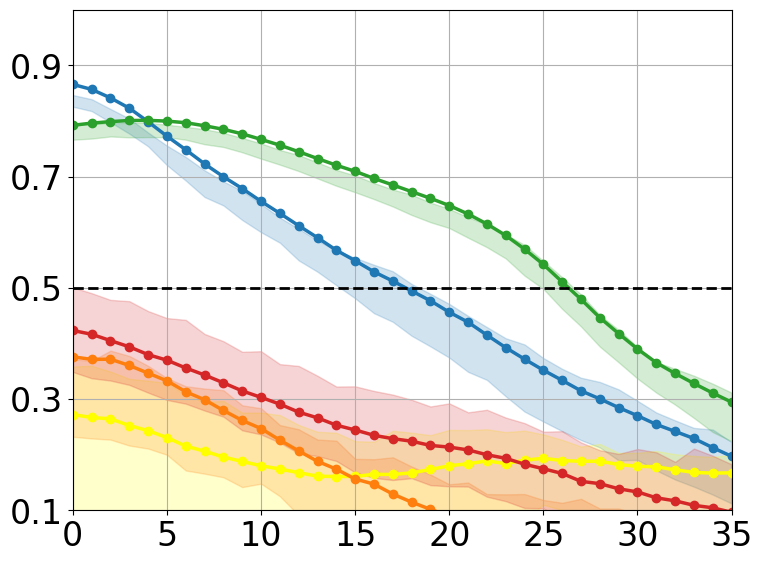

In [18]:
colors = ['tab:blue', 'tab:green', 'yellow', 'tab:orange', 'tab:red']
lead = 35
alpha = 0.2
plt.rcParams.update({'font.size': 24})
fig, ax = plt.subplots(1, 1, figsize=(8.5, 6.5))
lead_list = np.arange(lead+1)

ax.plot(lead_list, bcc_raw, 'o-', linewidth=2.5, color=colors[0], alpha=1.0)
ax.fill_between(lead_list, np.min(bccs_raw, axis=0), np.max(bccs_raw, axis=0), alpha=alpha, color=colors[0]) 

ax.plot(lead_list, bcc_mjo, 'o-', linewidth=2.5, color=colors[1], alpha=1.0)
ax.fill_between(lead_list, np.min(bccs_mjo, axis=0), np.max(bccs_mjo, axis=0), alpha=alpha, color=colors[1])
ax.plot(lead_list, bcc_rossby, 'o-', linewidth=2.5, color=colors[2], alpha=1.0)
ax.fill_between(lead_list, np.min(bccs_rossby, axis=0), np.max(bccs_rossby, axis=0), alpha=alpha, color=colors[2])
ax.plot(lead_list, bcc_kelvin, 'o-', linewidth=2.5, color=colors[3], alpha=1.0)
ax.fill_between(lead_list, np.min(bccs_kelvin, axis=0), np.max(bccs_kelvin, axis=0), alpha=alpha, color=colors[3])
ax.plot(lead_list, bcc_gravity, 'o-', linewidth=2.5, color=colors[4], alpha=1.0)
ax.fill_between(lead_list, np.min(bccs_gravity, axis=0), np.max(bccs_gravity, axis=0), alpha=alpha, color=colors[4])

xlim = [0, lead]
ylim = [0.1, 1.0]
ax.set_ylim(ylim)
ax.set_xlim(xlim)
ax.set_xticks(np.arange(0, lead+1, 5))
ax.grid(visible=True)
ax.plot(xlim, [0.5, 0.5], 'k--', linewidth=2)
ax.set_yticks(np.arange(ylim[0], ylim[1]+0.1, 0.2))

# save the figure as pdf
plt.savefig('./Figure_Hovmoller_BCC_ROMI_95d_OLRv1.pdf', bbox_inches='tight')

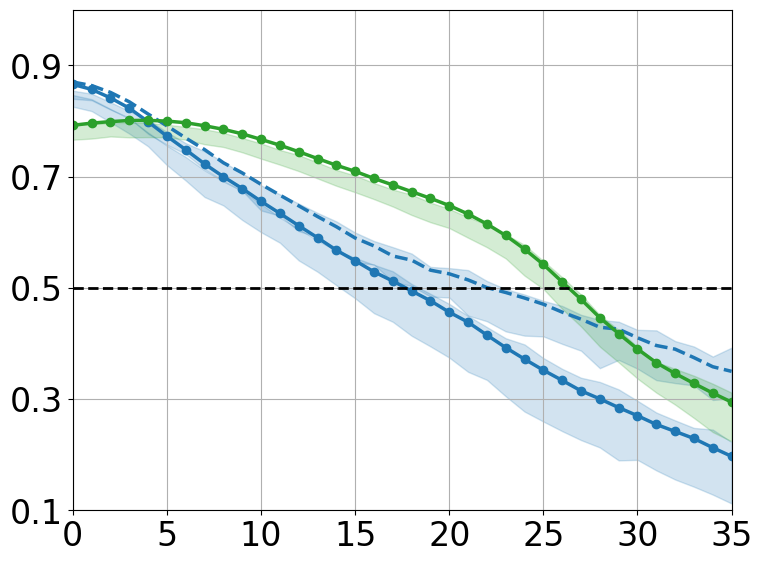

In [26]:
colors = ['tab:blue', 'tab:green', 'yellow', 'tab:orange', 'tab:red']
lead = 35
alpha = 0.2
plt.rcParams.update({'font.size': 24})
fig, ax = plt.subplots(1, 1, figsize=(8.5, 6.5))
lead_list = np.arange(lead+1)

ax.plot(lead_list, bcc_raw, 'o-', linewidth=2.5, color=colors[0], alpha=1.0)
ax.fill_between(lead_list, np.min(bccs_raw, axis=0), np.max(bccs_raw, axis=0), alpha=alpha, color=colors[0]) 

ax.plot(lead_list, bcc_raw30d, '--', linewidth=2.5, color=colors[0], alpha=1.0)
ax.fill_between(lead_list, np.min(bccs_raw30d, axis=0), np.max(bccs_raw30d, axis=0), alpha=alpha, color=colors[0]) 

ax.plot(lead_list, bcc_mjo, 'o-', linewidth=2.5, color=colors[1], alpha=1.0)
ax.fill_between(lead_list, np.min(bccs_mjo, axis=0), np.max(bccs_mjo, axis=0), alpha=alpha, color=colors[1])
# ax.plot(lead_list, bcc_rossby, 'o-', linewidth=2.5, color=colors[2], alpha=1.0)
# ax.fill_between(lead_list, np.min(bccs_rossby, axis=0), np.max(bccs_rossby, axis=0), alpha=alpha, color=colors[2])
# ax.plot(lead_list, bcc_kelvin, 'o-', linewidth=2.5, color=colors[3], alpha=1.0)
# ax.fill_between(lead_list, np.min(bccs_kelvin, axis=0), np.max(bccs_kelvin, axis=0), alpha=alpha, color=colors[3])
# ax.plot(lead_list, bcc_gravity, 'o-', linewidth=2.5, color=colors[4], alpha=1.0)
# ax.fill_between(lead_list, np.min(bccs_gravity, axis=0), np.max(bccs_gravity, axis=0), alpha=alpha, color=colors[4])

xlim = [0, lead]
ylim = [0.1, 1.0]
ax.set_ylim(ylim)
ax.set_xlim(xlim)
ax.set_xticks(np.arange(0, lead+1, 5))
ax.grid(visible=True)
ax.plot(xlim, [0.5, 0.5], 'k--', linewidth=2)
ax.set_yticks(np.arange(ylim[0], ylim[1]+0.1, 0.2))

# save the figure as pdf
plt.savefig('./Figure_Hovmoller_BCC_ROMI_95d_OLRv2.pdf', bbox_inches='tight')

In [2]:
fn_list = []
for exp in np.arange(1, 17):
    fn = f'/pscratch/sd/l/linyaoly/MJO_ML_2025/script/model/predictions/hov_allleads/UNet_A/exp{exp}/OLR_10deg_lead35_lr0.0002731083664610262_batch16_dropout0.1508158199542862_ch_32_ksize_11_5_hidden_256_128_opt_Adam_mom0.9_wd1.0823382755008339e-06_mem95.nc'
    fn_list.append(fn)

bcc, rmse = mjo.get_skill_all_leads_parallel('ROMI', fn_list=fn_list, rule='Iamp>1.0', month_list=None, datesta='2010-01-01', dateend='2015-12-31', lead_max=35, exp_list=np.arange(1, 17),
                       Fnmjo = '/pscratch/sd/l/linyaoly/MJO_ML_2025/script/model/data/target/romi/ROMI_NOAA_1979to2022.nc')
           

In [7]:
bccs = []
for exp in np.arange(1, 17):
    bccs.append(bcc[exp])

bccs = np.array(bccs)

In [9]:
bccs = np.mean(bccs, axis=0) 

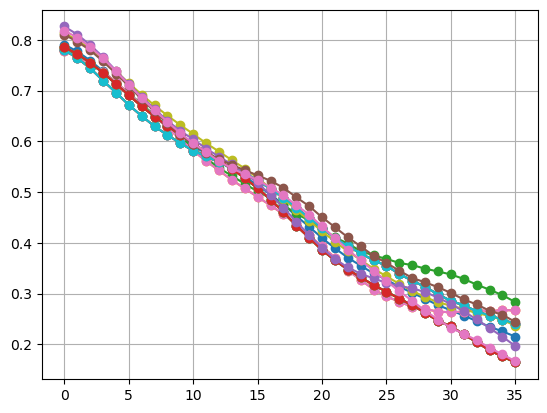

In [12]:
plt.plot(np.arange(0, 36), bccs,'o-')
for exp in np.arange(1, 17):
    plt.plot(np.arange(0, 36), bcc[exp], 'o-')

plt.grid()


In [3]:
fn = '/pscratch/sd/l/linyaoly/MJO_ML_2025/script/model/predictions/hov_allleads/UNet_A/exp1/OLR_10deg_lead35_lr0.0002731083664610262_batch16_dropout0.1508158199542862_ch_32_ksize_11_5_hidden_256_128_opt_Adam_mom0.9_wd1.0823382755008339e-06_mem95.nc'
bcc, rmse = mjo.get_skill_one_all_leads('ROMI', fn, rule='Iamp>1.0', month_list=None, datesta='2010-01-01', dateend='2015-12-31', lead_max=35,
                       Fnmjo = '/pscratch/sd/l/linyaoly/MJO_ML_2025/script/model/data/target/romi/ROMI_NOAA_1979to2022.nc')
            

In [13]:
fn = '/pscratch/sd/l/linyaoly/MJO_ML_2025/script/model/predictions/hov_allleads/UNet_A/exp1/OLR_10deg_lead35_lr0.0002731083664610262_batch16_dropout0.1508158199542862_ch_32_ksize_11_5_hidden_256_128_opt_Adam_mom0.9_wd1.0823382755008339e-06_mem95.nc'
fn = '/pscratch/sd/l/linyaoly/MJO_ML_2025/script/model/predictions/hov_allleads/UNet_A/exp1/OLR_10deg_lead35_lr0.0004744167496768269_batch32_dropout0.4970698867780492_ch_64_ksize_11_9_hidden_512_128_opt_SGD_mom0.9_wd6.2415353335793735e-06_mem95.nc'
bccval, rmseval = mjo.get_skill_one_all_leads('ROMI', fn, rule='Iamp>1.0', month_list=None, datesta='2010-01-01', dateend='2015-12-31', lead_max=35,
                       Fnmjo = '/pscratch/sd/l/linyaoly/MJO_ML_2025/script/model/data/target/romi/ROMI_NOAA_1979to2022.nc')
            

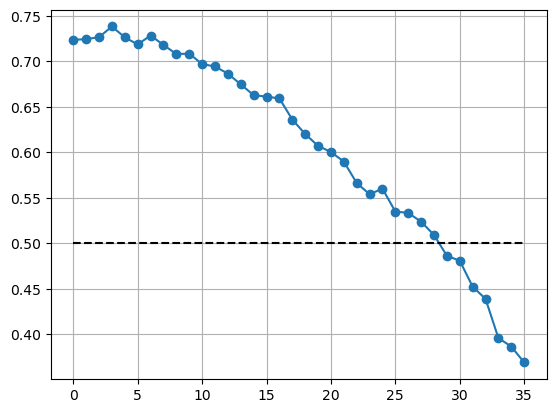

In [14]:
plt.plot(np.arange(0, 36), bccval,'o-')
plt.plot([0, 35], [0.5, 0.5], 'k--')
plt.grid()

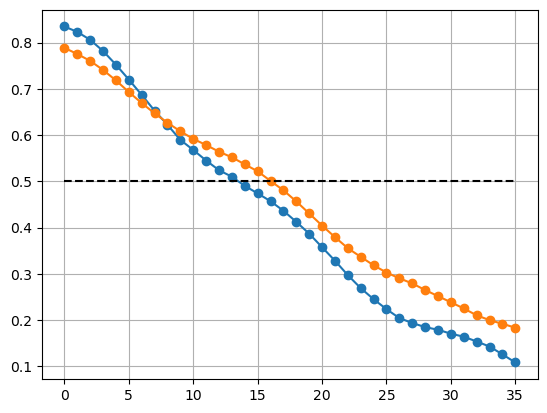

In [9]:
plt.plot(np.arange(0, 36), bcc,'o-')
plt.plot(np.arange(0, 36), bccval,'o-')
plt.plot([0, 35], [0.5, 0.5], 'k--')
plt.grid()